# Aim 

To implement and train Autoencoders for dimensionality reduction, image reconstruction, and denoising on the MNIST dataset, including exploration of hyperparameters and model evaluation





Nihar Lohar

Lab4 ATML, Autoencoder



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

val_size = int(len(x_test) * 0.7) #taking 70% for validation
x_val = x_test[:val_size]
y_val = y_test[:val_size]
x_test_split = x_test[val_size:]
y_test_split = y_test[val_size:]

In [5]:
inputSize = 28 * 28
latentSize = 64
inputLayer = Input(shape=(inputSize,))
encode = Dense(latentSize, activation='relu')(inputLayer)
decode = Dense(inputSize, activation='sigmoid')(encode)
autoencoder = Model(inputLayer, decode)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=256,
                validation_data=(x_val, x_val))

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0958 - val_loss: 0.0334
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0300 - val_loss: 0.0216
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0201 - val_loss: 0.0157
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0149 - val_loss: 0.0121
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0115 - val_loss: 0.0097
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093 - val_loss: 0.0080
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0078 - val_loss: 0.0069
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0067 - val_loss: 0.0061
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [ ]:
val_loss = autoencoder.evaluate(x_val, x_val)
print(f'Validation Loss (MSE): {val_loss}')

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0042
Validation Loss (MSE): 0.004083027597516775


In [ ]:
test_loss = autoencoder.evaluate(x_test_split, x_test_split)
print(f'Test Loss (MSE): {test_loss}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035
Test Loss (MSE): 0.003701376263052225


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


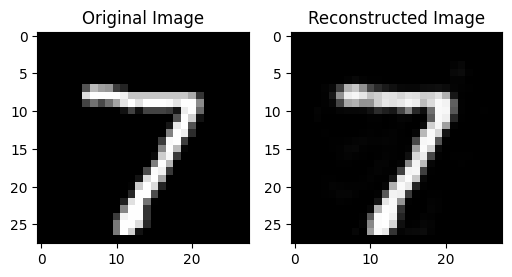

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


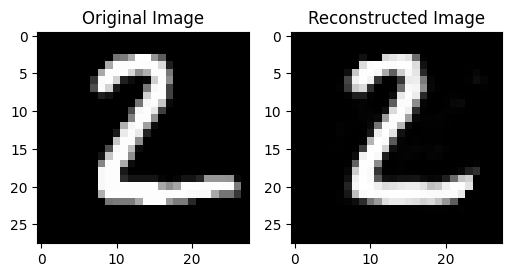

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


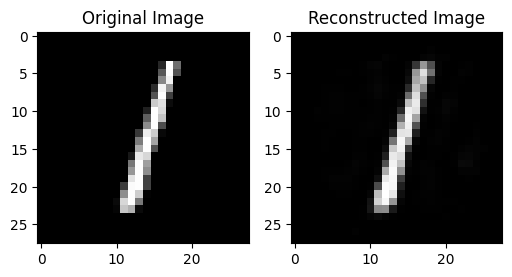

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


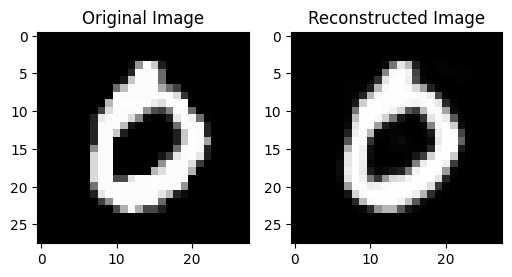

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


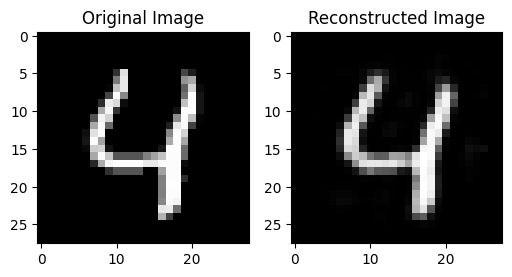

In [ ]:
for i in range(5):
    original_image = x_val[i].reshape(28, 28)

    input_image = np.expand_dims(x_val[i], axis=0)

    reconstructed_image = autoencoder.predict(input_image)

    reconstructed_image = reconstructed_image.reshape(28, 28)

    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed_image, cmap='gray')

    plt.show()


In [ ]:
def train_and_evaluate(latent_size, learning_rate, epochs, hidden_activation, optimizer):
    inputLayer = Input(shape=(inputSize,))
    encode = Dense(latent_size, activation=hidden_activation)(inputLayer)
    decode = Dense(inputSize, activation='sigmoid')(encode)
    autoencoder = Model(inputLayer, decode)

    autoencoder.compile(optimizer=optimizer(learning_rate=learning_rate), loss='mse')

    autoencoder.fit(x_train, x_train,
                    epochs=epochs,
                    batch_size=256,
                    validation_data=(x_val, x_val),
                    verbose=0)

    val_loss = autoencoder.evaluate(x_val, x_val, verbose=0)

    test_loss = autoencoder.evaluate(x_test_split, x_test_split, verbose=0)

    return val_loss, test_loss


In [ ]:
from tensorflow.keras.optimizers import SGD

hyperparams = [
    {'latent_size': 32, 'learning_rate': 0.001, 'epochs': 25, 'hidden_activation': 'relu', 'optimizer': Adam},
    {'latent_size': 64, 'learning_rate': 0.001, 'epochs': 25, 'hidden_activation': 'relu', 'optimizer': Adam},
    {'latent_size': 128, 'learning_rate': 0.001, 'epochs': 25, 'hidden_activation': 'relu', 'optimizer': Adam},
    {'latent_size': 64, 'learning_rate': 0.01, 'epochs': 25, 'hidden_activation': 'relu', 'optimizer': Adam},
    {'latent_size': 64, 'learning_rate': 0.001, 'epochs': 50, 'hidden_activation': 'relu', 'optimizer': SGD},
    {'latent_size': 64, 'learning_rate': 0.001, 'epochs': 25, 'hidden_activation': 'sigmoid', 'optimizer': Adam},
]


In [ ]:
import pandas as pd

results = []

for params in hyperparams:
    val_loss, test_loss = train_and_evaluate(
        params['latent_size'],
        params['learning_rate'],
        params['epochs'],
        params['hidden_activation'],
        params['optimizer']
    )

    results.append({
        'Latent Size': params['latent_size'],
        'Learning Rate': params['learning_rate'],
        'Epochs': params['epochs'],
        'Hidden Activation Function': params['hidden_activation'],
        'Optimizer': params['optimizer'].__name__,
        'Validation Loss (MSE)': val_loss,
        'Test Loss (MSE)': test_loss
    })

results_df = pd.DataFrame(results)
print(results_df)


   Latent Size  Learning Rate  Epochs Hidden Activation Function Optimizer  \
0           32          0.001      25                       relu      Adam   
1           64          0.001      25                       relu      Adam   
2          128          0.001      25                       relu      Adam   
3           64          0.010      25                       relu      Adam   
4           64          0.001      50                       relu       SGD   
5           64          0.001      25                    sigmoid      Adam   

   Validation Loss (MSE)  Test Loss (MSE)  
0               0.010181         0.009382  
1               0.004058         0.003771  
2               0.001910         0.001841  
3               0.013206         0.012599  
4               0.229223         0.228566  
5               0.015276         0.014617  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error


In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

val_size = int(len(x_test) * 0.7)
x_val = x_test[:val_size]
y_val = y_test[:val_size]
x_test_split = x_test[val_size:]
y_test_split = y_test[val_size:]


In [35]:
def add_gaussian_noise(images, noise_factor=0.4):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

In [36]:
x_train_noisy = add_gaussian_noise(x_train)
x_val_noisy = add_gaussian_noise(x_val)
x_test_noisy = add_gaussian_noise(x_test_split)

In [42]:
inputSize = 28 * 28
latentSize = 1000

inputLayer = Input(shape=(inputSize,))
encode = Dense(latentSize, activation='relu')(inputLayer)
decode = Dense(inputSize, activation='sigmoid')(encode)
autoencoder = Model(inputLayer, decode)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history = autoencoder.fit(x_train_noisy, x_train,
                         epochs=30,
                         batch_size=256,
                         validation_data=(x_val_noisy, x_val))

val_loss = autoencoder.evaluate(x_val_noisy, x_val)
print(f'Validation Loss (MSE): {val_loss}')

test_loss = autoencoder.evaluate(x_test_noisy, x_test_split)
print(f'Test Loss (MSE): {test_loss}')

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0599 - val_loss: 0.0225
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0213 - val_loss: 0.0176
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0171 - val_loss: 0.0142
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0136 - val_loss: 0.0121
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0117 - val_loss: 0.0110
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0105 - val_loss: 0.0106
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0099 - val_loss: 0.0103
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0095 - val_loss: 0.0100
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0092 - val_loss: 0.0099
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0089 - val_loss: 0.0098
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0087 - val_loss: 0.0096
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/ste

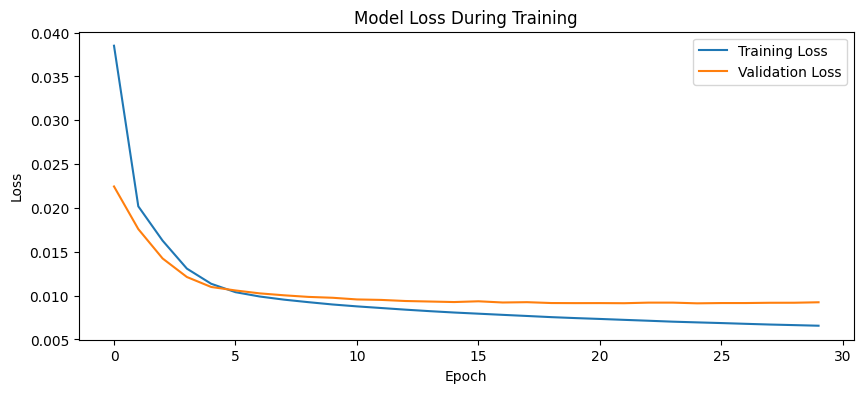

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


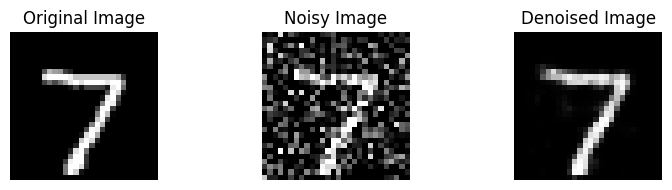

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


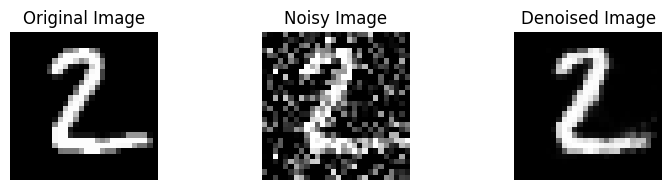

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


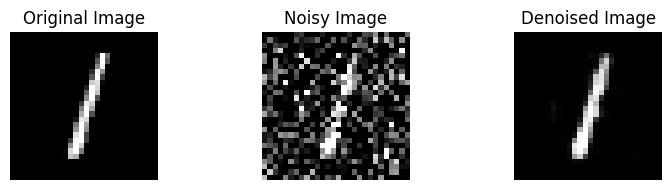

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


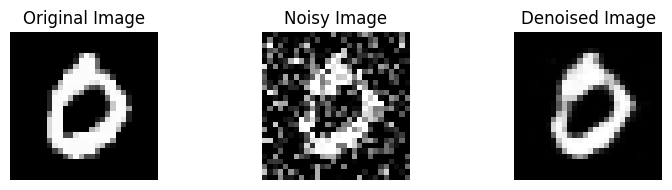

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


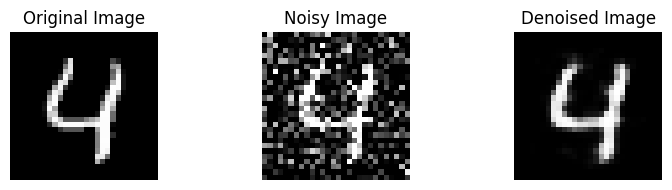

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


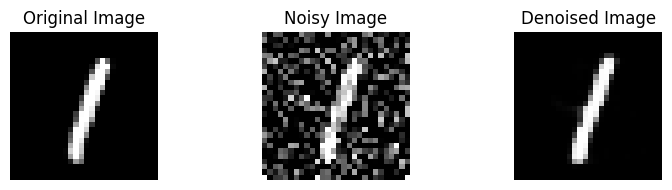

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


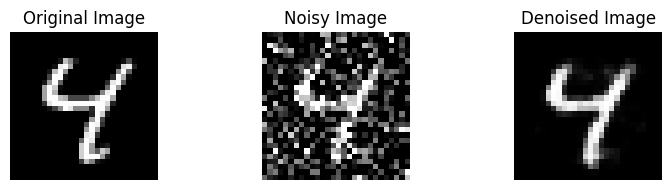

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


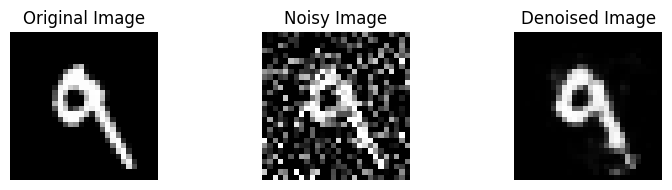

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


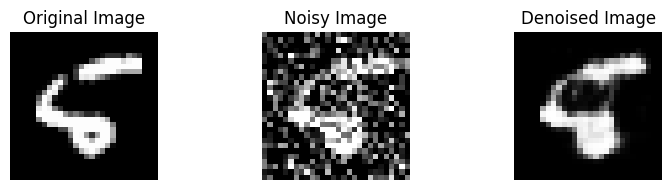

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


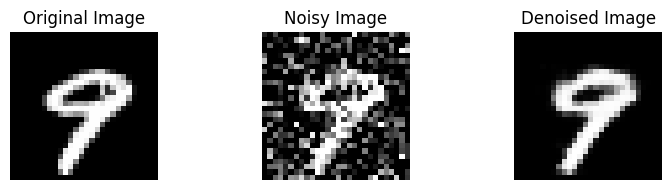

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


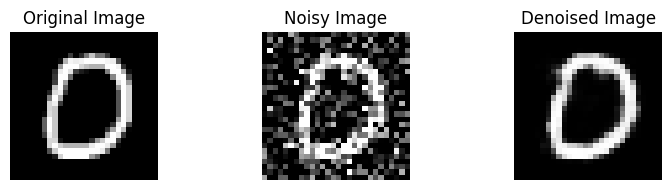

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


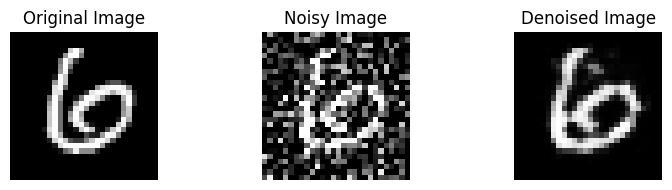

In [43]:
def plot_results(original, noisy, reconstructed, index):
    plt.figure(figsize=(8, 2))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original.reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Noisy Image")
    plt.imshow(noisy.reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Denoised Image")
    plt.imshow(reconstructed.reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

for i in range(12):
    original_image = x_val[i]
    noisy_image = x_val_noisy[i]
    reconstructed_image = autoencoder.predict(noisy_image.reshape(1, -1))[0]

    plot_results(original_image, noisy_image, reconstructed_image, i)